In [21]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import minmax_scale, OneHotEncoder
from sklearn.model_selection import train_test_split

In [23]:
data=pd.read_csv('/content/fashion-mnist_train.csv')
data

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,9,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6,0,0,0,0,0,0,0,5,0,...,0.0,0.0,0.0,30.0,43.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0,0,1,2,0,0,0,0,...,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,3,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1882,8,0,0,0,0,0,0,0,0,0,...,217.0,216.0,215.0,218.0,203.0,5.0,0.0,2.0,0.0,0.0
1883,6,0,0,0,0,0,0,0,0,0,...,71.0,62.0,64.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1884,4,0,0,0,0,0,0,0,0,2,...,6.0,0.0,55.0,210.0,210.0,133.0,0.0,0.0,0.0,0.0
1885,5,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
data.isnull().sum()

label       0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel780    1
pixel781    1
pixel782    1
pixel783    1
pixel784    1
Length: 785, dtype: int64

In [28]:
data=data.dropna()
data

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,9,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6,0,0,0,0,0,0,0,5,0,...,0.0,0.0,0.0,30.0,43.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0,0,1,2,0,0,0,0,...,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,3,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1881,0,0,0,0,0,0,0,0,0,1,...,129.0,119.0,118.0,61.0,0.0,0.0,0.0,0.0,0.0,0.0
1882,8,0,0,0,0,0,0,0,0,0,...,217.0,216.0,215.0,218.0,203.0,5.0,0.0,2.0,0.0,0.0
1883,6,0,0,0,0,0,0,0,0,0,...,71.0,62.0,64.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1884,4,0,0,0,0,0,0,0,0,2,...,6.0,0.0,55.0,210.0,210.0,133.0,0.0,0.0,0.0,0.0


In [30]:
x=data.drop(['label'],axis=1)
y=data['label']

In [36]:
print("The size of the train dataset",x.shape)
print("the data type of the dataset ",x.dtypes)

The size of the train dataset (1886, 784)
the data type of the dataset  pixel1        int64
pixel2        int64
pixel3        int64
pixel4        int64
pixel5        int64
             ...   
pixel780    float64
pixel781    float64
pixel782    float64
pixel783    float64
pixel784    float64
Length: 784, dtype: object


In [37]:
x=x.astype('float64')

In [38]:
x.dtypes

pixel1      float64
pixel2      float64
pixel3      float64
pixel4      float64
pixel5      float64
             ...   
pixel780    float64
pixel781    float64
pixel782    float64
pixel783    float64
pixel784    float64
Length: 784, dtype: object

In [39]:
# Min-max scaling
x_scaled = minmax_scale(x, feature_range=(0, 1))
x_scaled

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [58]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y,
                                            test_size=0.2, random_state=42)

In [59]:
print("The size of the train dataset",x_train.shape)
print("The size of the test dataset",y_train.shape )

The size of the train dataset (1320, 784)
The size of the test dataset (1320,)


# Defining The Model

In [60]:
from sklearn.neural_network import BernoulliRBM
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [101]:
# Create an RBM model
rbm = BernoulliRBM(n_components=300, learning_rate=0.03, n_iter=25,
                   random_state=42, verbose=True)


In [102]:
# Create a classifier
classifier = LogisticRegression(max_iter=600)


In [103]:
# Create a pipeline combining RBM and classifier
pipeline = Pipeline(steps=[('rbm', rbm), ('classifier', classifier)])

In [104]:
# Train the model
history=pipeline.fit(x_train, y_train)

[BernoulliRBM] Iteration 1, pseudo-likelihood = -312.47, time = 0.87s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -290.40, time = 1.64s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -273.33, time = 1.48s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -274.82, time = 0.42s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -261.95, time = 0.42s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -287.46, time = 0.43s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -250.02, time = 0.40s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -247.79, time = 0.43s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -244.51, time = 0.41s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -243.16, time = 0.44s
[BernoulliRBM] Iteration 11, pseudo-likelihood = -244.49, time = 0.41s
[BernoulliRBM] Iteration 12, pseudo-likelihood = -242.74, time = 0.41s
[BernoulliRBM] Iteration 13, pseudo-likelihood = -245.11, time = 0.42s
[BernoulliRBM] Iteration 14, pseudo-likelihood = -237.78, time = 0.42s
[BernoulliRBM] 

In [105]:
# Make predictions on the test set
y_pred = pipeline.predict(x_test)
y_pred

array([3, 5, 1, 9, 0, 5, 1, 6, 1, 5, 3, 8, 9, 5, 6, 2, 2, 7, 3, 8, 9, 5,
       6, 6, 2, 6, 1, 5, 3, 4, 3, 2, 9, 3, 9, 7, 8, 2, 0, 6, 6, 2, 5, 7,
       7, 8, 4, 7, 7, 2, 5, 2, 4, 6, 8, 5, 0, 6, 6, 1, 0, 4, 5, 3, 9, 2,
       6, 8, 0, 4, 9, 1, 5, 5, 0, 8, 1, 6, 3, 3, 4, 9, 7, 8, 4, 0, 9, 7,
       0, 8, 1, 4, 8, 3, 0, 6, 1, 6, 9, 5, 2, 4, 7, 1, 1, 2, 5, 4, 2, 8,
       0, 7, 8, 6, 3, 7, 9, 7, 1, 0, 3, 0, 5, 2, 7, 5, 2, 6, 2, 5, 5, 1,
       0, 4, 8, 4, 8, 2, 6, 9, 2, 6, 9, 5, 3, 6, 4, 5, 0, 7, 3, 8, 6, 1,
       4, 1, 8, 0, 9, 3, 6, 9, 8, 7, 9, 3, 7, 4, 7, 8, 5, 0, 9, 7, 7, 3,
       2, 1, 8, 3, 1, 1, 5, 1, 2, 6, 8, 5, 2, 9, 2, 4, 3, 7, 4, 1, 6, 9,
       2, 0, 7, 3, 1, 3, 6, 2, 1, 4, 9, 2, 0, 4, 7, 4, 9, 6, 4, 5, 3, 4,
       8, 4, 6, 1, 3, 3, 8, 5, 3, 9, 2, 3, 3, 8, 2, 8, 5, 9, 4, 4, 7, 4,
       3, 4, 0, 1, 3, 8, 4, 1, 1, 0, 8, 0, 7, 2, 1, 5, 9, 6, 8, 1, 0, 2,
       4, 6, 2, 5, 6, 4, 7, 3, 2, 5, 4, 9, 7, 2, 9, 3, 5, 8, 4, 3, 7, 2,
       0, 3, 4, 6, 0, 1, 4, 5, 7, 6, 3, 6, 6, 4, 7,

In [106]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

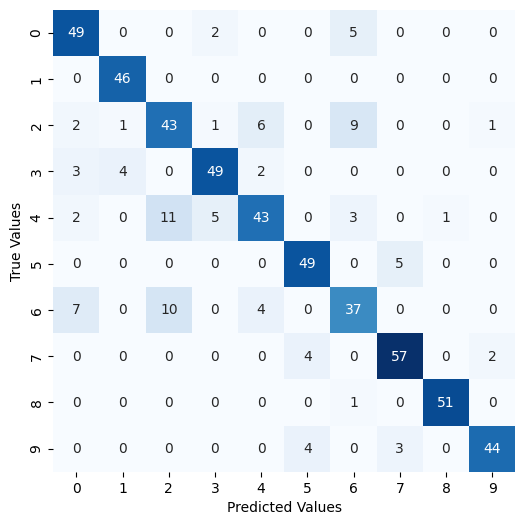

In [107]:
fig = plt.figure(figsize=(6, 6)) # Set Figure

Y_pred = np.argmax(y_pred, axis=0) # Decode Predicted labels
Y_test = np.argmax(y_test, axis=0) # Decode labels

mat = confusion_matrix(y_test, y_pred) # Confusion matrix

# Plot Confusion matrix
sns.heatmap(mat.T, square=True, annot=True, cbar=False, cmap=plt.cm.Blues)
plt.xlabel('Predicted Values')
plt.ylabel('True Values');
plt.show();

In [108]:
# Evaluate the model
from sklearn.metrics import classification_report
print('\nClassification Report :\n',classification_report(y_test, y_pred))


Classification Report :
               precision    recall  f1-score   support

           0       0.88      0.78      0.82        63
           1       1.00      0.90      0.95        51
           2       0.68      0.67      0.68        64
           3       0.84      0.86      0.85        57
           4       0.66      0.78      0.72        55
           5       0.91      0.86      0.88        57
           6       0.64      0.67      0.65        55
           7       0.90      0.88      0.89        65
           8       0.98      0.98      0.98        52
           9       0.86      0.94      0.90        47

    accuracy                           0.83       566
   macro avg       0.84      0.83      0.83       566
weighted avg       0.83      0.83      0.83       566

